In [12]:
from packages.display.core import *
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 5)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [17]:
cube_params = {
  'freq'     : 718000,
  'alpha'    : 0,
  'delta'    : 0,
  'spe_bw'   : 1000,
  'spe_res'  : 1,
  's_f'      : 8,
  's_a'      : 1}

In [20]:
len(y)

100

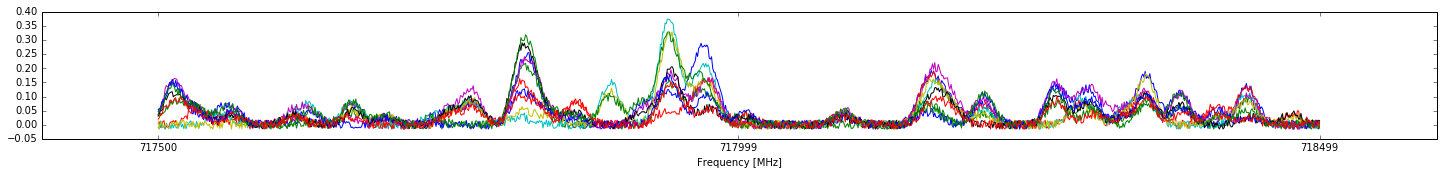

In [26]:
cube_name = 'data/cube_'

x = get_freq_index_from_params(cube_params)
for i in range(0, 10):
    plt.subplot(2, 1, 2)
    file_path = cube_name + str(i) + '.fits'
    train_pixel = (1, 1)
    data = get_data_from_fits(file_path)  
    y = data[:, train_pixel[0], train_pixel[1]]
    plt.plot(x, y)

    plt.legend(loc='upper right')
    
"""lines = get_lines_from_fits(file_path)
for line in lines:
    # Shows lines really present
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])

    plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g')
    plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')"""

        
plt.xticks([(x[0]), (x[0]+x[-1])/2 ,(x[-1])])
plt.xlabel("Frequency [MHz]")



In [22]:
cube_name = 'data/cube_'

dictionary = load_dictionary('band_9_dual')

dictionary_recal, detected_peaks = recal_words(file_path, dictionary, cube_params)

x = get_freq_index_from_params(cube_params)
for i in range(0, 1):
    plt.subplot(2, 1, 2)
    file_path = cube_name + str(i + 10) + '.fits'
    train_pixel = (1, 1)
    y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
    plt.plot(x, y)

    plt.legend(loc='upper right')
    plt.xlim(xmin = x[0], xmax = x[-1])
    plt.ylim(ymin = min(y) - 0.01, ymax = max(y) + 0.01)
    
    for idx in range(0, len(detected_peaks)):
        if detected_peaks[idx] != 0:
            plt.axvline(x=x[idx], ymin=0, ymax= 1, color='r')
        
plt.xticks([(x[0] + 500), (x[0]+x[-1])/2 ,(x[-1] - 500)])
plt.xlabel("Frequency [MHz]")


ValueError: Length mismatch: Expected axis has 4000 elements, new values have 1000 elements

In [3]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 4.89 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 24.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 10,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax


6


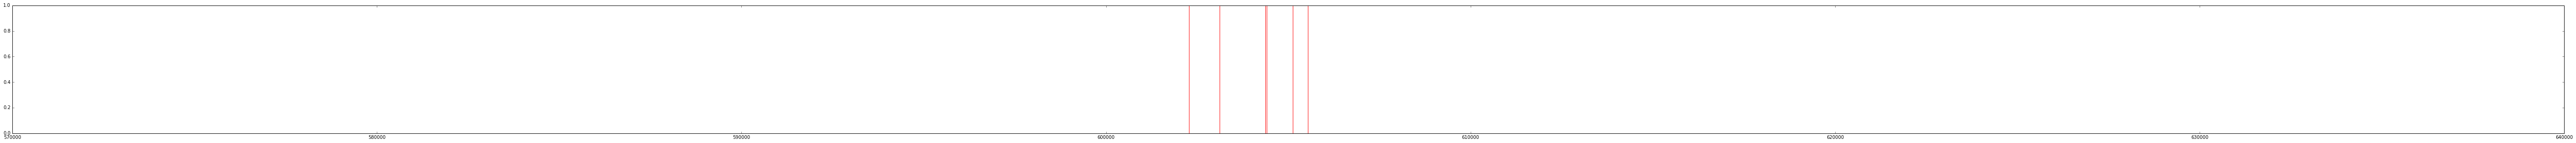

In [9]:
file_path = cube_name + '1.fits'

cube_name = 'data/cube_fixed_width_'

dictionary = load_dictionary('band_9_dual')

train_pixel = (1, 1)

dictionary_recal, detected_peaks = recal_words(file_path, dictionary, cube_params, 1)

X = get_values_filtered_normalized(file_path, train_pixel, cube_params)

y_train = get_fortran_array(np.asmatrix(X))
dictionary_recal_fa = np.asfortranarray(dictionary_recal,
                                        dtype= np.double)

lambda_param = 0
x = get_freq_index_from_params(cube_params)
for idx in range(0, len(detected_peaks)):
    if detected_peaks[idx] != 0:
        plt.axvline(x=x[idx], ymin=0, ymax= 1, color='r', label='Detected peak' if idx == 0 else "")
        lambda_param += 1
        
print(lambda_param)

param = {
  'lambda1' : lambda_param,
  # 'L': 1,
  'pos' : True,
  'mode' : 0,
  'ols' : True,
  'numThreads' : -1}

alpha = spams.lasso(y_train, dictionary_recal_fa, **param).toarray()
total = np.inner(dictionary_recal_fa, alpha.T)